# THE CONSOLE WARS. 
Dataset retrieved from https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings

The aim of this notebook is to learn about IBM Aapche Spark service within Bluemix using Video Games Sales dataset.

Install Wordcloud package

In [1]:
!pip install wordcloud

Load up the dataset and define the libraries to be used

In [2]:
import seaborn as sns
from io import StringIO
import requests
import json
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

# @hidden_cell
# This function accesses a file in your Object Storage. The definition contains your credentials.
# You might want to remove those credentials before you share your notebook.
def get_object_storage_file_with_credentials_bcf4ed88b59d42cdbd7a2c3e6f773a1a(container, filename):
    """This functions returns a StringIO object containing
    the file content from Bluemix Object Storage."""

    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': 'member_56a12f82a6eb7d2ddd55076fc159f2d781e6024b','domain': {'id': '50b6f04bf8a84254ac52217214173665'},
            'password': 'KUm9}cEeVP)2L~!~'}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', container, '/', filename])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO(resp2.text)

df = pd.read_csv(get_object_storage_file_with_credentials_bcf4ed88b59d42cdbd7a2c3e6f773a1a('ProjectDemos', 'Video_Games_Sales_as_at_22_Dec_2016.csv'))
df.head()


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51,8,322,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73,8,192,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


Removing any null values in the dataset

In [3]:
df = df.dropna(axis=0)

Needed to show the upcoming graphs inline

In [4]:
%matplotlib inline

In [5]:
df['Publisher'].value_counts(sort=True).head(5)

Electronic Arts                944
Ubisoft                        496
Activision                     492
Sony Computer Entertainment    316
THQ                            307
Name: Publisher, dtype: int64

We will plot and find out which top 10 publishers have had the most global sales across all platforms

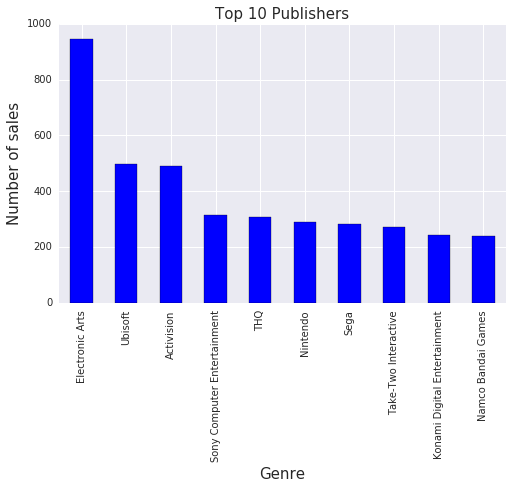

In [6]:
fig,ax = plt.subplots(figsize=(8,5))
df['Publisher'].value_counts(sort=True).head(10).plot(kind='bar',ax=ax,rot =90)
plt.title('Top 10 Publishers',fontsize=15)
plt.xlabel('Genre',fontsize=15)
plt.ylabel('Number of sales',fontsize=15)

We will also try to examine what rating most games that are made fall into across all platforms.

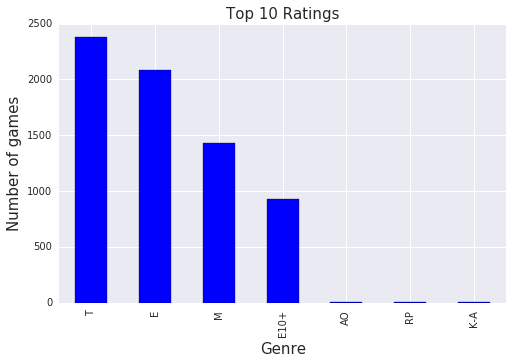

In [7]:
fig,ax = plt.subplots(figsize=(8,5))
df['Rating'].value_counts(sort=True).head(10).plot(kind='bar',ax=ax,rot =90)
plt.title('Top 10 Ratings',fontsize=15)
plt.xlabel('Genre',fontsize=15)
plt.ylabel('Number of games',fontsize=15)

We can analyse how the popularity of games have evolved thorughout the years across all platforms

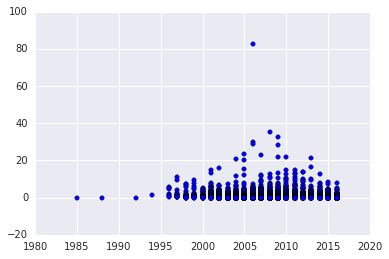

In [8]:
plt.scatter(df['Year_of_Release'], df['Global_Sales'])
plt.show()

We will examine if the critic score of a particular game increases its sales numbers across all platforms.

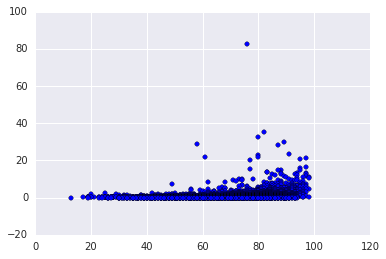

In [9]:
plt.scatter(df['Critic_Score'], df['Global_Sales'])
plt.show()

We will analyse if the user count affect the global sales.

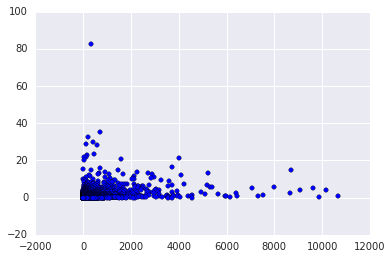

In [10]:
plt.scatter(df['User_Count'], df['Global_Sales'])
plt.show()

A wordcloud generates prominent words in a dataset of possible genres. The bigger the size, the more games of that genre were made.

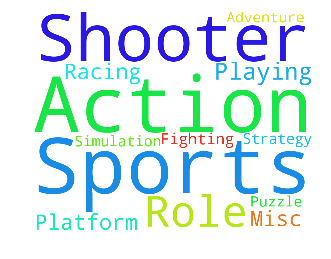

In [11]:

from wordcloud import WordCloud, STOPWORDS
# Generating the wordcloud with the values under the Platform feature
platform = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1000,
                          height=800
                         ).generate(" ".join(df['Genre'].values))
plt.imshow(platform.recolor( random_state=17), alpha=1)
plt.axis('off')
plt.show()


We see that the sports, action and ther shooter categories are particularly popular.

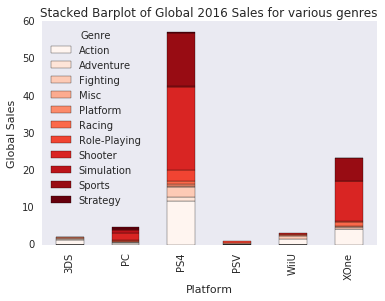

In [12]:
release2016 = df[df['Year_of_Release'] == 2016]
yearlySales = release2016.groupby(['Platform','Genre']).Global_Sales.sum()
yearlySales.unstack().plot(kind='bar',stacked=True, colormap= 'Reds',  grid=False)
plt.title('Stacked Barplot of Global 2016 Sales for various genres')
plt.ylabel('Global Sales')